In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from copy import deepcopy

In [3]:
df = pd.read_csv('datasets/ml-latest-small/ratings.csv')
# create dataframe with movieId as rows and userId as columns (using pivot function from ChatGPT)
ratings = df.pivot(index='userId', columns='movieId', values='rating').dropna(thresh=25).dropna(axis='columns', thresh=4)
ratingsMatrix = ratings.values

In [4]:
def findRatings(mat):
    indeces = []
    numRows, numCols = mat.shape
    for row in range(numRows):
        for col in range(numCols):
            if not np.isnan(mat[row][col]):
                indeces.append((row, col))
    return indeces

In [5]:
totalIndeces = findRatings(ratingsMatrix)
train, test = train_test_split(totalIndeces, test_size=0.1)

In [6]:
def rmse(org, rep, indeces):
    sum = 0
    for row, col in indeces:
        diff = org[row][col] - rep[row][col]
        sum += diff * diff
    return np.sqrt(sum/len(indeces))

In [7]:
# returns (P, Q)
def createPQ(dimension, rank):
    return (np.square(np.random.rand(dimension[0], rank)-0.5), np.square(np.random.rand(rank, dimension[1])-0.5))

P, Q = createPQ(ratingsMatrix.shape, 10)

In [8]:
# returns (P, Q, training error, testing error)
def epoch(original, fP, fQ, a, fTrain, fTest):

    # train on elements from training set
    fQ = fQ.T
    for i, j in fTrain:
        alphaGradient = (original[i][j] - np.dot(fP[i], fQ[j]))*a
        fP[i], fQ[j] = fP[i] + fQ[j]*alphaGradient, fQ[j] + fP[i]*alphaGradient
    fQ = fQ.T

    # return P, Q, training error and testing error
    reconstruction = fP @ fQ
    return (fP, fQ, rmse(original, reconstruction, fTrain), rmse(original, reconstruction, fTest))

In [9]:
def matrixCompletion(original, fP, fQ, rank, stepSize, numEpochs):

    # run matrix completion, keep track of error
    trainErrors, testErrors = [], []
    for i in range(numEpochs):
        fP, fQ, trainE, testE = epoch(original, fP, fQ, stepSize, train, test)
        trainErrors.append(trainE)
        testErrors.append(testE)

    # plot error
    plt.plot(range(len(trainErrors)), trainErrors, label='Training Error')
    plt.plot(range(len(testErrors)), testErrors, label='Testing Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

    return fP, fQ

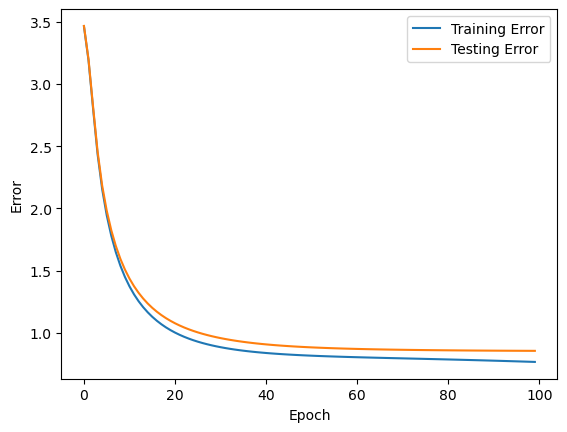

TypeError: cannot unpack non-iterable NoneType object

In [14]:
# perform matrix completion
newP, newQ = matrixCompletion(ratingsMatrix, deepcopy(P), deepcopy(Q), 10, 0.001, 100)

In [ ]:
newMatrix = newP @ newQ
